In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [71]:
# tp = []
# for i in train.first_party_winner:
#     apd = len(train[train['first_party_winner'] == 1])/len(train)
#     if i == 1:
#         tp.append(apd)
#     else:
#         tp.append(abs(1-apd))
# train['first_party_winner'] = tp

In [72]:
train

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [73]:
train.first_party_winner.value_counts()

1    1649
0     829
Name: first_party_winner, dtype: int64

In [74]:
1649/2478

0.66545601291364

In [75]:
train.facts[0]

'On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather t

In [76]:
import re

reg = re.compile('[a-zA-Z]+')
mat = reg.findall(train.facts[0])
print(mat)

' '.join(mat)

['On', 'June', 'Phil', 'St', 'Amant', 'a', 'candidate', 'for', 'public', 'office', 'made', 'a', 'television', 'speech', 'in', 'Baton', 'Rouge', 'Louisiana', 'During', 'this', 'speech', 'St', 'Amant', 'accused', 'his', 'political', 'opponent', 'of', 'being', 'a', 'Communist', 'and', 'of', 'being', 'involved', 'in', 'criminal', 'activities', 'with', 'the', 'head', 'of', 'the', 'local', 'Teamsters', 'Union', 'Finally', 'St', 'Amant', 'implicated', 'Herman', 'Thompson', 'an', 'East', 'Baton', 'Rouge', 'deputy', 'sheriff', 'in', 'a', 'scheme', 'to', 'move', 'money', 'between', 'the', 'Teamsters', 'Union', 'and', 'St', 'Amant', 's', 'political', 'opponent', 'Thompson', 'successfully', 'sued', 'St', 'Amant', 'for', 'defamation', 'Louisiana', 's', 'First', 'Circuit', 'Court', 'of', 'Appeals', 'reversed', 'holding', 'that', 'Thompson', 'did', 'not', 'show', 'St', 'Amant', 'acted', 'with', 'malice', 'Thompson', 'then', 'appealed', 'to', 'the', 'Supreme', 'Court', 'of', 'Louisiana', 'That', 'cour

'On June Phil St Amant a candidate for public office made a television speech in Baton Rouge Louisiana During this speech St Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union Finally St Amant implicated Herman Thompson an East Baton Rouge deputy sheriff in a scheme to move money between the Teamsters Union and St Amant s political opponent Thompson successfully sued St Amant for defamation Louisiana s First Circuit Court of Appeals reversed holding that Thompson did not show St Amant acted with malice Thompson then appealed to the Supreme Court of Louisiana That court held that although public figures forfeit some of their First Amendment protection from defamation St Amant accused Thompson of a crime with utter disregard of whether the remarks were true Finally that court held that the First Amendment protects uninhibited robust debate rather than an open season to shoot down the good name 

In [77]:
from nltk.corpus import stopwords, names
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

stops = stopwords.words('english')
stops.append('a')
stops.append('s')

wnl = WordNetLemmatizer()

In [78]:
reg = re.compile('[a-zA-Z]+')
for i in range(len(train)):
    first = reg.findall(train.first_party[i]) 
    second = reg.findall(train.second_party[i])
    first.extend([i.lower() for i in first])
    second.extend([i.lower() for i in second])

    tp = nltk.tag.pos_tag(word_tokenize(train.facts[i]))
    tp = [t[0] for t in tp if (t[1] != "TO") and (t[1] != 'DT') and (t[1] != 'CC') and (t[1] != 'IN')]
    tp = ' '.join(tp)    
    
    fact = ' '.join(reg.findall(tp))

    for f in first:
        if f in fact:
            fact = fact.replace(f' {f} ',' <fst> ')
    for f in second:
        if f in fact:
            fact = fact.replace(f' {f} ',' <scd> ')
    
    tp = fact.split()
    tp = [i.lower() for i in tp]
    tp = [wnl.lemmatize(i) for i in tp]
    for j in tp:
        if j in stops:
            tp.remove(j)

    fact = ' '.join(tp)  
    tp = word_tokenize(fact)
    fact = ' '.join(tp)
    fact = fact.replace('<','').replace('>','')
#     if 'fst' not in fact or 'scd' not in fact:
#         train = train.drop(i)
#     else:
    train.loc[i,'facts'] = fact
            
for i in range(len(test)):
    first = reg.findall(test.first_party[i])
    second = reg.findall(test.second_party[i])
    first.extend([i.lower() for i in first])
    second.extend([i.lower() for i in second])
    
    tp = nltk.tag.pos_tag(word_tokenize(test.facts[i]))
    tp = [t[0] for t in tp if (t[1] != "TO") and (t[1] != 'DT') and (t[1] != 'CC') and (t[1] != 'IN')]
    tp = ' '.join(tp)        

    fact = ' '.join(reg.findall(tp))
    
#     for s in stops:
#         if s in fact:
#             fact = fact.replace(s,'')
    for f in first:
        if f in fact:
            fact = fact.replace(f' {f} ',' <fst> ')
    for f in second:
        if f in fact:
            fact = fact.replace(f' {f} ',' <scd> ')
    
    tp = fact.split()
    tp = [i.lower() for i in tp]
    tp = [wnl.lemmatize(i) for i in tp]

    for j in tp:
        if j in stops:
            tp.remove(j)
    
    fact = ' '.join(tp)
    tp = word_tokenize(fact)
    fact = ' '.join(tp)
    fact = fact.replace('<','').replace('>','')
#     if 'fst' not in fact or 'scd' not in fact:
#         test = test.drop(i)
#     else:
    test.loc[i,'facts'] = fact

In [79]:
test.facts[1]

'lexecon  scd  wa defendant class action lawsuit usc section lawsuit wa transferred pretrial proceeding district arizona section authorizes judicial panel multidistrict litigation transfer civil action common issue fact district coordinated consolidated pretrial proceeding provides panel shall remand action original district conclusion pretrial proceeding claim were dismissed  scd  brought suit  fst   fst   fst   fst   fst  others  fst  class action lawsuit northern district illinois ultimately panel section ordered case transferred district arizona afterwards  scd  moved arizona district court remand case illinois  fst  filed countermotion requesting arizona district court invoke section transfer case trial ultimately court assigned case court appeal affirmed judgment'

In [80]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [81]:
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True,max_features=20000)
vectorizer.fit(train.facts)
tp = vectorizer.transform(train.facts).toarray()

for i in range(1,len(tp[0])+1):
    train[i] = [j[i-1] for j in tp]
    
train

,ID,first_party,second_party,facts,first_party_winner,1,2,3,4,5,...,13356,13357,13358,13359,13360,13361,13362,13363,13364,13365
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,june fst fst fst candidate public office...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,ramon nelson wa riding bike suffered lethal bl...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",alabama state court convicted fst fst fst...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,Linkletter,Walker,victor fst wa convicted state court evidence...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,april selma scd intruder broke apartment dau...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",congress amended clean air act energy policy a...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",alliance scd scd scd investment scd pu...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,TRAIN_2475,Peguero,United States,district court sentenced manuel fst month im...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,march enrico scd scd lawful permanent resi...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
train

,ID,first_party,second_party,facts,first_party_winner,1,2,3,4,5,...,13356,13357,13358,13359,13360,13361,13362,13363,13364,13365
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,june fst fst fst candidate public office...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,ramon nelson wa riding bike suffered lethal bl...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",alabama state court convicted fst fst fst...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,Linkletter,Walker,victor fst wa convicted state court evidence...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,april selma scd intruder broke apartment dau...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",congress amended clean air act energy policy a...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",alliance scd scd scd investment scd pu...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,TRAIN_2475,Peguero,United States,district court sentenced manuel fst month im...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,march enrico scd scd lawful permanent resi...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
for i in range(len(train)):
    if ('fst' not in train.loc[i,'facts']) or ('scd' not in train.loc[i,'facts']):
        train = train.drop(i)

train = train.reset_index(drop=True)
train

,ID,first_party,second_party,facts,first_party_winner,1,2,3,4,5,...,13356,13357,13358,13359,13360,13361,13362,13363,13364,13365
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,june fst fst fst candidate public office...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0004,William Earl Fikes,Alabama,april selma scd intruder broke apartment dau...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0005,"C & A Carbone, Inc., et al.",Town of Clarkstown,new york scd scd allowed contractor constr...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0007,"US Airways, Inc.",Barnett,robert scd injured back working cargo handli...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0009,Paul A. McDaniel,"Selma Cash Paty, et al.",first state constitution tennessee ha statute ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,TRAIN_2470,Bethel School District No. 403,"Matthew N. Fraser, a minor, and E.L. Fraser, G...",school assembly approximately high fst stude...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,TRAIN_2471,United States,James X. Bormes,october fst fst treasury department launch...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",alliance scd scd scd investment scd pu...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,march enrico scd scd lawful permanent resi...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# subset_0 = train[train["first_party_winner"] == 0]
# subset_1 = train[train["first_party_winner"] == 1]

# subset_1_downsampled = resample(subset_1,
#                                 replace=False,
#                                 n_samples=1000,
#                                 random_state=77)

# train = pd.concat([subset_0, subset_1_downsampled])

In [91]:
tp = vectorizer.transform(test.facts).toarray()

for i in range(1,len(tp[0])+1):
    test[i] = [j[i-1] for j in tp]
    
test

,ID,first_party,second_party,facts,1,2,3,4,5,6,...,13356,13357,13358,13359,13360,13361,13362,13363,13364,13365
0,TEST_0000,Salerno,United States,bail reform act allowed federal court detain a...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",lexecon scd wa defendant class action lawsui...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",fox scd scd broadcast billboard music awar...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TEST_0003,Harold Kaufman,United States,trial armed robbery federally insured saving l...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEST_0004,Berger,Hanlon,magistrate judge issued warrant authorizing se...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",according executive order signed president geo...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",section clean air act caa requires environment...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,linda fst fst fst created plan utilizing...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,north carolina board agriculture adopted regul...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# from sklearn.linear_model import LogisticRegression
# lg = LogisticRegression()
# lg.fit(train.iloc[:,5:],list(train.iloc[:,4]))

In [92]:
from pycaret import classification
classification.setup(data=train.iloc[:,4:],
                     target='first_party_winner',
                     fold_strategy='kfold',
                     train_size=0.8,
                     session_id=77,
                     remove_outliers=True,
                     outliers_threshold=0.02,
                     outliers_method='iforest')

,Description,Value
0,Session id,77
1,Target,first_party_winner
2,Target type,Binary
3,Original data shape,"(1483, 13366)"
4,Transformed data shape,"(1459, 13366)"
5,Transformed train set shape,"(1162, 13366)"
6,Transformed test set shape,"(297, 13366)"
7,Numeric features,13365
8,Preprocess,True
9,Imputation type,simple


In [95]:
best = classification.compare_models(n_select=10,fold=10,sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6738,0.5204,0.9986,0.6737,0.8040,0.0048,0.0170,1.8970
catboost,CatBoost Classifier,0.6729,0.5392,0.9661,0.6812,0.7983,0.0473,0.0831,2.1320
dummy,Dummy Classifier,0.6729,0.5000,1.0000,0.6729,0.8039,0.0000,0.0000,1.3050
rf,Random Forest Classifier,0.6712,0.5377,0.9870,0.6746,0.8009,0.0131,0.0344,1.5180
et,Extra Trees Classifier,0.6644,0.5143,0.9724,0.6734,0.7953,0.0006,0.0054,1.3470
ridge,Ridge Classifier,0.6585,0.0000,0.9345,0.6785,0.7857,0.0270,0.0410,1.3320
gbc,Gradient Boosting Classifier,0.6560,0.5084,0.9196,0.6809,0.7818,0.0384,0.0498,1.5410
lda,Linear Discriminant Analysis,0.6384,0.5208,0.9105,0.6694,0.7711,-0.0176,-0.0201,1.3620
xgboost,Extreme Gradient Boosting,0.6315,0.5296,0.8357,0.6852,0.7525,0.0505,0.0558,1.4400
lightgbm,Light Gradient Boosting Machine,0.6214,0.5211,0.8419,0.6752,0.7487,0.0116,0.0136,1.3040


Processing:   0%|          | 0/78 [00:00<?, ?it/s]

In [96]:
best

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=77, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DummyClassifier(constant=None, random_state=77, strategy='prior'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=77, verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      cri

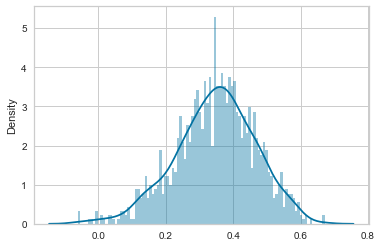

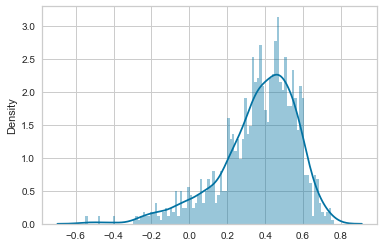

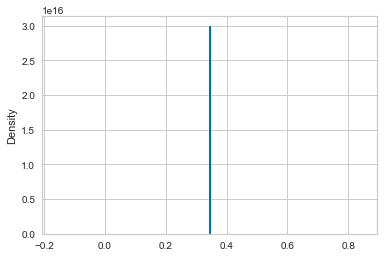

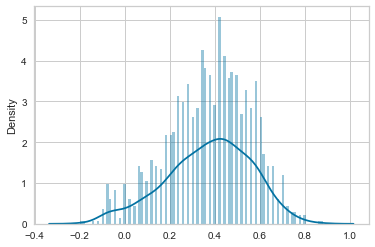

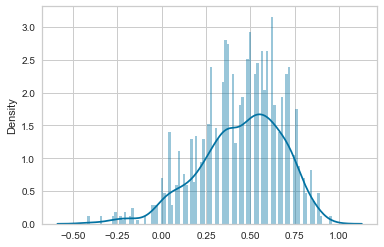

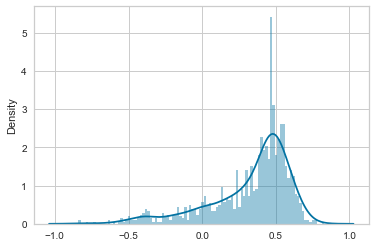

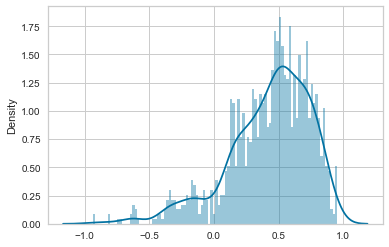

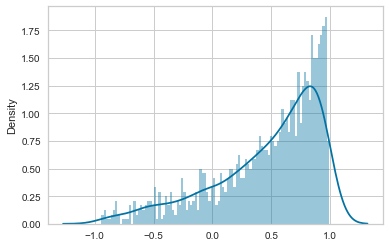

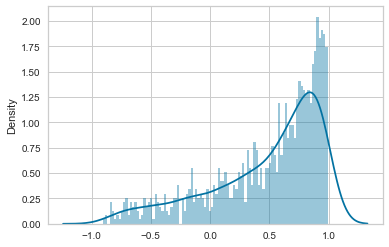

In [117]:
for i in range(10):
    try:
        sns.distplot([i[1]-i[0] for i in best[i].predict_proba(test.iloc[:,4:])],bins=100)
        plt.show()
    except:pass

<AxesSubplot: ylabel='Density'>

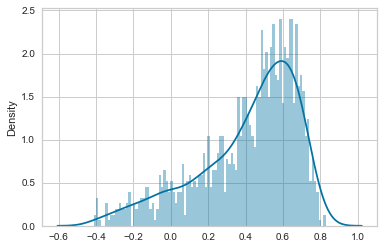

In [118]:
import seaborn as sns

tp0 = best[0].predict_proba(test.iloc[:,4:])
# tp1 = best[1].predict_proba(test.iloc[:,4:])
tp2 = best[9].predict_proba(test.iloc[:,4:])

tp0 = np.array([tp0,tp2]).mean(axis=0)
sns.distplot([i[1]-i[0] for i in tp0],bins=100)


# tp0 = np.array([best[i].predict_proba(test.iloc[:,4:]) for i in range(2)]).mean(axis=0)
# for j in range(5):
#     if j == 3:
#         continue
#     tp0 = best[j].predict_proba(test.iloc[:,4:])
#     sns.distplot([i[1]-i[0] for i in tp0],bins=100)


In [119]:
tp0

array([[0.15953545, 0.84046455],
       [0.61733288, 0.38266712],
       [0.22413132, 0.77586868],
       ...,
       [0.22557608, 0.77442392],
       [0.36835884, 0.63164116],
       [0.17580562, 0.82419438]])

In [125]:
ans = []
for i in tp0:
    if i[1]-i[0] < 0.4:
        ans.append(0)
    else:
        ans.append(1)
sum(ans)

765

In [126]:
len(ans)

1240

In [127]:
sum(ans)/len(ans)

0.6169354838709677

In [128]:
sub = pd.read_csv('./sample_submission.csv').set_index('ID')
sub['first_party_winner'] = ans
sub.to_csv('./submission.csv')